In [434]:
import numpy as np
import xlrd
import xlwt
import math
import matplotlib.pyplot as plt
from math import *

capital = 10000

def average(lis):
    return np.sum(lis)/len(lis)

def my_std(tlist, monthl):
    monthl.append(len(tlist))
    return [[np.std(tlist[monthl[i]:monthl[i+j+1]], ddof = 1)*math.sqrt(250) for i in range(0,len(monthl)-1-j)] for j in range(len(monthl)-1)]


def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0


def bsform(s,x,r,sigma,tau):
    d1 = (np.log(s/x)+(r+sigma*sigma/2)*tau)/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*math.sqrt(tau)
    return s*phi(d1)-x*math.exp(-r*tau)*phi(d2)

def calc_impliedvol(st, en, strike, op_price, fut_price, tau, rate, date):
    if en - st < 0.0000000001:
        return st
    else:
        mid = (st+en)/2
        pst = bsform(fut_price, strike, rate, st, tau) - op_price
        pen = bsform(fut_price, strike, rate, en, tau) - op_price
        pmid = bsform(fut_price, strike, rate, mid, tau) - op_price
        if pst*pmid <= 0:
            return calc_impliedvol(st, mid, strike, op_price, fut_price, tau, rate, date)
        if pen*pmid <= 0:
            return calc_impliedvol(mid, en, strike, op_price, fut_price, tau, rate, date)
        if pst*pmid > 0 and pen*pmid > 0:
            print("a replace occured"+str(st)+': '+str(pst+op_price)+' —— '+str(en)+': '+str(pen+op_price))
            print("op_price: "+ str(op_price))
            print(date)
            return 0
    
def delta(s,x,r,sig,tau):
    d = (math.log(s/x)+(r+sig**2)*tau)/(sig*math.sqrt(tau))
    return phi(d)
    
# used to divide the data into real months
def extr_month(strr):
    return int(strr[strr.find('/')+1:strr.rfind('/')])

def divide_month(mtim):
    length = len(mtim)
    ret = [0]
    for i in range(1,length):
        month = extr_month(mtim[i])
        premonth = extr_month(mtim[i-1])
        if month != premonth:
            ret.append(i)
    return ret

In [435]:
futuredata = xlrd.open_workbook(u'future price.xls').sheets()[0]
cone_data = xlrd.open_workbook(u'cone data.xlsx').sheets()[0].col_values(3)[1:]
date = xlrd.open_workbook(u'cone data.xlsx').sheets()[0].col_values(0)[1:]
fut_price = futuredata.col_values(1)[1:]
tau = np.array(futuredata.col_values(7)[1:])/356
op2700 = xlrd.open_workbook(u'Moption price_2700.xlsx').sheets()[0].col_values(1)[1:]
op2750 = xlrd.open_workbook(u'Moption price_2750.xlsx').sheets()[0].col_values(1)[1:]
op2800 = xlrd.open_workbook(u'Moption price_2800.xlsx').sheets()[0].col_values(1)[1:]
op2850 = xlrd.open_workbook(u'Moption price_2850.xlsx').sheets()[0].col_values(1)[1:]
op_price = [(op2700[i]/(fut_price[i]-2700)**6 + op2750[i]/(fut_price[i]-2750)**6 + op2800[i]/(fut_price[i]-2800)**6 + op2850[i]/(fut_price[i]-2850)**6)/(1/(fut_price[i]-2700)**6 + 1/(fut_price[i]-2750)**6 + 1/(fut_price[i]-2800)**6 + 1/(fut_price[i]-2850)**6) for i in range(len(fut_price))]
divedmonth = divide_month(date)
pre_cone = my_std(cone_data,divedmonth)
post_cone = [[min(i) for i in pre_cone],[sum(i)/len(i) for i in pre_cone],[max(i) for i in pre_cone]]

#### The function defination and volatility calculation process is above.
- plot the cone

[0.22517020576642935, 0.23186015629544732, 0.2341703270406014, 0.23596786428680686, 0.23510641086986006, 0.2331942653553348, 0.2334318560759827, 0.23596974760956685, 0.24068762603101687, 0.24384416399818684, 0.24477542852472772, 0.24081947905907145]


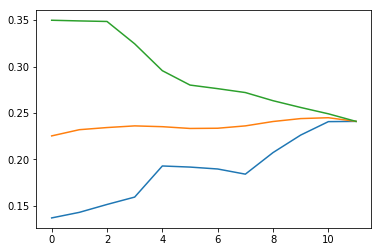

In [436]:
# plot the volatility cone calculated between 2016-04-01 and 2017-04-01
plt.plot(post_cone[0])
plt.plot(post_cone[1])
plt.plot(post_cone[2])
print(post_cone[1])

##### Plot the price of option at different exercize price. 
- Here we use square weighted mean to normalize the different data and make the result more accurate for the price of option we used is nearer to the at-the-money option

[107.5, 90.5, 75.0, 91.0, 94.0, 108.0, 140.5, 134.0, 131.0, 121.5, 148.5, 142.5, 132.0, 150.0, 142.5, 114.0, 104.5, 100.0, 159.5, 146.5, 152.0, 133.0, 122.0, 117.5, 130.0, 124.5, 101.0, 92.0, 83.0, 105.0, 80.0, 66.0, 69.5, 66.5, 64.5, 64.5, 55.5, 35.5, 36.0, 36.0, 39.5, 38.0, 41.5, 49.5, 51.5, 47.5, 42.5, 47.5, 39.5, 46.0, 53.0, 53.5, 48.0, 34.0, 30.0, 32.5, 34.0, 31.5, 33.5, 30.5, 80.5, 86.5, 85.0, 93.0, 108.0, 180.0, 189.0, 179.0, 122.5, 87.0, 88.0, 97.0, 94.0, 100.5, 123.5, 71.5, 117.5, 69.5, 74.0, 93.0, 92.5]


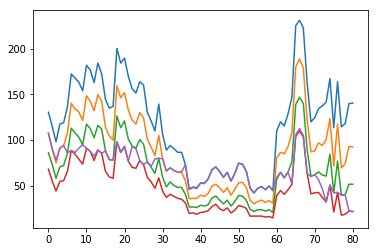

In [437]:
#plt.plot(op_price)
plt.plot(op2700)
plt.plot(op2750)
plt.plot(op2800)
plt.plot(op2850)
print(op2750)
plt.plot(op_price)

*There is a question that can we simply weighted average option price and option striking price? For striking price the average is reasonable. But why price?*

We can see that if we can hold a portfolio that make the ratio of options at different striking price meet the condition that the price of the portfolio is lower or a little higher than a single option whoes striking price equals to the average striking price of portfolio, we can arbitrage by buying the portfolio and selling the single option. So is it exist?

[3.0250000000000057, 0.3999999999999915, 0.5999999999999943, 0.45000000000000284, 2.0, 0.6500000000000057, 1.4249999999999972, -0.4499999999999744, 1.3250000000000028, 0.4000000000000057, 2.374999999999986, 1.22499999999998, 2.924999999999997, 3.2250000000000085, 4.074999999999974, 1.375, 1.0250000000000057, -4.25, -0.6500000000000199, 0.8500000000000085, 0.049999999999968736, 0.6499999999999915, 0.3999999999999915, -0.375, 1.0750000000000028, -0.29999999999999716, 0.9249999999999972, -0.2500000000000142, -0.22500000000000853, -1.375, 0.3999999999999915, 0.5750000000000028, -0.9499999999999886, -0.375, 0.7250000000000085, 0.8250000000000028, 2.2749999999999986, 2.8999999999999986, 2.25, 3.125, 2.5250000000000057, 1.6000000000000014, 1.6749999999999972, 1.1000000000000014, 0.4999999999999929, 1.3249999999999957, 1.5, 1.7750000000000057, 1.8250000000000028, 1.6000000000000014, -0.22499999999999432, 1.0999999999999943, 1.5, 2.0249999999999986, 1.9250000000000043, 0.9750000000000014, 1.375

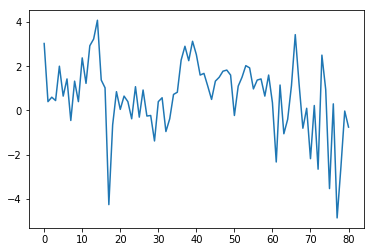

In [438]:
x3 = 0.1
x1 = 1/2+x3/2
x2 = 1/2-x3*3/2

b =[-(op2700[i]*x1+op2800[i]*x2+op2850[i]*x3 - op2750[i])+(x1*(2808-2700)+x2*(2808-2800)-(2808-2750)) for i in range(len(op2850))]
print([-(op2700[i]*x1+op2800[i]*x2+op2850[i]*x3 - op2750[i])+(x1*(2808-2700)+x2*(2808-2800)-(2808-2750)) for i in range(len(op2850))])
a = [op2700[i]*x1+op2800[i]*x2+op2850[i]*x3 - op2750[i] for i in range(len(op2850))]
plt.plot(b)
print(x1*2700+x2*2800+x3*2850)
print(x1*(2808-2700)+x2*(2808-2800)-(2808-2750))

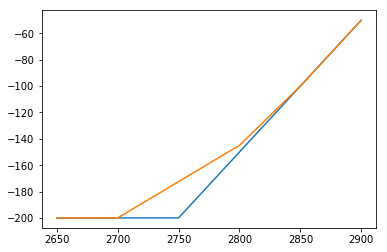

In [439]:
x = [i/10 for i in range(26500,29000)]
ycurv = [max(0,t-2750)-200 for t in x]
ypcurv = [x1*(max(0,t-2700)-200)+x2*(max(0,t-2800)-200)+x3*(max(0,t-2850)-200) for t in x]
plt.plot(x,ycurv)
plt.plot(x,ypcurv)

Maturity: 2018/4/10

Price of future: 2808

Yeild: x+ $\alpha_1+\alpha_2+\alpha_3$

We can see that is oppotunity to arbitrage does not exist. And the mean of given option price is a overestimated price of the target option.

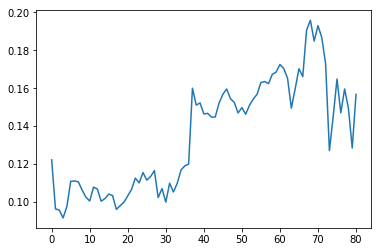

In [440]:
impv = [calc_impliedvol(0.000001, 1, (2700/(fut_price[i]-2700)**6 +2750/(fut_price[i]-2750)**6 + 2800/(fut_price[i]-2800)**6 +2850/(fut_price[i]-2850)**6)/(1/(fut_price[i]-2700)**6 + 1/(fut_price[i]-2750)**6 + 1/(fut_price[i]-2800)**6 + 1/(fut_price[i]-2850)**6),op_price[i], fut_price[i], tau[i], 0.05, date[i]) for i in range(len(op_price))]
plt.plot(impv)

In [441]:
av_impv = average(impv)
mid_impv = np.median(impv)
av_cone = average(post_cone[1])
print(av_impv, mid_impv, av_cone, av_cone - av_impv ,av_cone - mid_impv)

0.13518729558894568 0.1448541517781849 0.2362497942427527 0.10106249865380701 0.0913956424645678


**We can see from average number of implied volatility and historical volatility showed above that the implied volatility is 8%-10% lower than historical volatility as a whole. **For the average historical volatility is stable across different term, what mentioned above implies that we can use the historical cone we got before to decide whether the current implied volatility(comes from market price of option now) is too high or too low, which means arbitrage oppotunity.

Next we will test our trading strategy from 2017-12-01 to 2018-04-01.

In [442]:
#import the data of future price, tau and option price.
cat_of_price = np.array([2800, 2850, 2900, 2950, 3000, 3050, 3100]).T
opp_set = xlrd.open_workbook(u'toption_price.xlsx').sheets()[0]
op_preprice = np.array([opp_set.col_values(1)[1:], opp_set.col_values(2)[1:], opp_set.col_values(3)[1:], opp_set.col_values(4)[1:], opp_set.col_values(5)[1:], opp_set.col_values(6)[1:], opp_set.col_values(7)[1:]]).T
tfuturedata = np.array(xlrd.open_workbook(u'tfuture price.xlsx').sheets()[0].col_values(1)[1:])
opweight = 1/(np.array([tfuturedata, tfuturedata, tfuturedata, tfuturedata, tfuturedata, tfuturedata, tfuturedata]).T-cat_of_price)**4
sumweight = opweight.sum(axis = 1).reshape(80,1)
op_tprice = (op_preprice *opweight /sumweight).sum(axis = 1)
strike_tprice = np.dot(opweight,cat_of_price.reshape(7,1))/sumweight
ttau = np.array(opp_set.col_values(8)[1:])/365
tdate = opp_set.col_values(0)[1:]
fut_tprice = tfuturedata

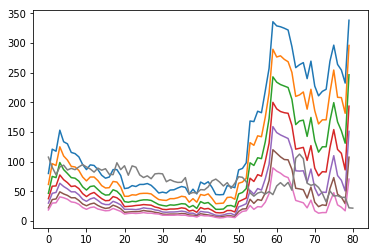

In [443]:
plt.plot(op_preprice[:,0])
plt.plot(op_preprice[:,1])
plt.plot(op_preprice[:,2])
plt.plot(op_preprice[:,3])
plt.plot(op_preprice[:,4])
plt.plot(op_preprice[:,5])
plt.plot(op_preprice[:,6])
plt.plot(op_price)


In [444]:
#calculator of term month.
def calmonth(dat):
    return (4-extr_month(dat)+12)%12

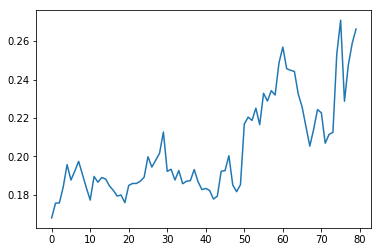

In [445]:
timpv = [calc_impliedvol(0.000001, 1, strike_tprice[i], op_tprice[i], tfuturedata[i], ttau[i], 0.05, tdate[i])+0.09 for i in range(len(op_tprice))]
plt.plot(timpv)
tdelta = [delta(tfuturedata[i], strike_tprice[i], 0.05, timpv[i], ttau[i]) for i in range(len(ttau))]

**There is a trick. For you will never know today's close price of future, you can only set the option ratio from yesterday's data. Which means you need to calculate your ratio today from data yesterday.**

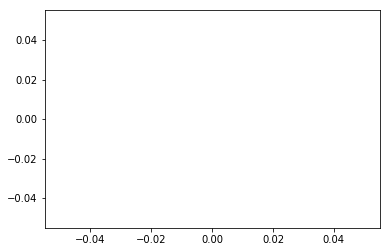

In [446]:
hold_price = (opweight[:-1,:]*op_preprice[1:,:]/sumweight[:-1]).sum(axis = 1)


###################################
stest_weight = (opweight /sumweight)
###################################
cons = [ [], [], [] ]
###################################


# We choose buying call and shorting future to long volatility, selling call and longing future to short volatility.
ntyeild = [0]
cyeild = 0
pos = 0
for i in range(2,len(tdate)):
    tyear, tmonth, tday, ta, tb, tc = xlrd.xldate_as_tuple(tdate[i], 0)
    cons[0].append(post_cone[0][(15-tmonth)%12])
    cons[1].append(post_cone[1][(15-tmonth)%12])
    cons[2].append(post_cone[2][(15-tmonth)%12])    
    
    if pos == 1:
        cyeild += math.log((capital+hold_price[i-1]-tdelta[i-1]*fut_tprice[i])/(capital+hold_price[i-2]+tdelta[i-1]*fut_tprice[i-1]))
        ntyeild.append(ntyeild[len(ntyeild)-1]+hold_price[i-1]-hold_price[i-2]+tdelta[i-1]*(-fut_tprice[i]+fut_tprice[i-1]))
        if cyeild >= 0.05 or abs(timpv[i]-post_cone[1][(15-tmonth)%12])/post_cone[1][(15-tmonth)%12] < 0.05:
            print("Long Square at "+str(tyear)+'-'+str(tmonth)+'-'+str(tday))
            pos = 0

    if pos == -1:
        cyeild += math.log((capital-hold_price[i-1]+tdelta[i-1]*fut_tprice[i])/(capital+hold_price[i-2]-tdelta[i-1]*fut_tprice[i-1]))
        ntyeild.append(ntyeild[len(ntyeild)-1]-hold_price[i-1]+hold_price[i-2]+tdelta[i-1]*(fut_tprice[i]-fut_tprice[i-1]))
        if cyeild >= 0.05 or abs(timpv[i]-post_cone[1][(15-tmonth)%12])/post_cone[1][(15-tmonth)%12] < 0.05:
            print("Short Square at "+str(tyear)+'-'+str(tmonth)+'-'+str(tday))
            pos = 0
    if pos == 0 and (timpv[i] < post_cone[0][(15-tmonth)%12]):
        #volatility is underestimated, long
        pos = 1
        ntyeild.append(ntyeild[len(ntyeild)-1])
        print("- Long Position at "+str(tyear)+'-'+str(tmonth)+'-'+str(tday)+"implied volatility is "+str(timpv[i])+'   '+str(post_cone[0][(15-tmonth)%12]))
        print("Weight = ",stest_weight[i-1], timpv[i],"Data today is "+str(tyear)+'-'+str(tmonth)+'-'+str(tday))
        
    if pos == 0 and (timpv[i] > post_cone[2][(15-tmonth)%12]):
        #volatility is overestimated, short
        pos = -1
        ntyeild.append(ntyeild[len(ntyeild)-1])
        print("- Short Position at "+str(tyear)+'-'+str(tmonth)+'-'+str(tday)+"implied volatility is "+str(timpv[i])+'   '+str(post_cone[2][(15-tmonth)%12]))
plt.plot(ntyeild)

**Whoops! The curve of yeild is a constant zero. That means the trading strategy will never be excuted during the selected time period. Plot the cone curve and implied curve below.**

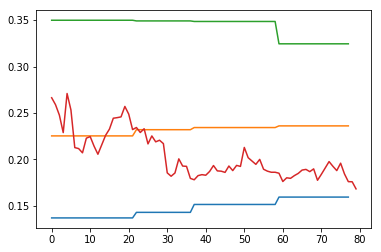

In [447]:
test_weight = (opweight /sumweight)
plt.plot(list(reversed(cons[0])))
plt.plot(list(reversed(cons[1])))
plt.plot(list(reversed(cons[2])))
plt.plot(list(reversed(timpv)))

#### Let me pretend to have presented a satisfying result :-) There are still some parts to be improved：

-  I just simplified the dynamic price process to closed price. This may cause a unknown loss that strategy cannot react to the instant change of IV, so that misses some arbitrage oppotunities.
- The calculated deltas is far from the accurate values. Volatility is constant in classic Black-Scholes Model, but in the market volatility is not a fixed value, nor is it possible to have a decisive relationship with historical volatility. So should we use historical volatility or calculated-implied volatility to caculate delta? (I think IV here is more precise, but I think it's not accurate all the same) Meanwhile, the hedging delta is ever-change, delta used here is rough-calculated. That will cause directional fluctuation not be fully hedged, which results in a loss.(Actually, we're talking about problem of gamma)
- Deciding if volatility is too high by comparing to historical volatility is reasonable. But the accuracy of increasing IV by a fixed number need discussing.
- The volatility cone we have contains some discrete points rather than continuity curve. That will result in a loss of accruracy.
- Will weighted average approch improve the performance of the trading algorithm or make it worse？